# exercise 7
Task 7.1 Combine year 2019 and year 2020’s crime records into one pandas dataframe. Drop duplicates as well as any record that has missing values in the following columns: “INCIDENT_NUMBER”, “OFFENSE_CODE”, “DISTRICT”, “Long”, “Lat”, “SHOOTING”, “OCCURRED_ON_DATE”. Save the “cleaned” pandas dataframe to a separate csv file. Based on the cleaned dataframe and the offense codes provided here (Links to an external site.), count the total number of violent vs. property crime incidents in Boston in year 2019 and year 2020 respectively. Print the results. Do you see any trend? 

In [328]:
import pandas
crime2019 = pandas.read_csv("2019_boston_crime.csv", low_memory=False)
crime2019.dtypes #incident number is mostly int64, but had a few bad pieces of data that ruined it
crime2020 = pandas.read_csv("2020_boston_crime.csv", low_memory=False)
print(crime2020.dtypes)

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP     float64
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                 int64
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART               float64
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object


In [329]:
combinedCrime = pandas.concat([crime2019, crime2020])

In [330]:
combinedCrime.describe()

,OFFENSE_CODE,OFFENSE_CODE_GROUP,SHOOTING,YEAR,MONTH,HOUR,UCR_PART,Lat,Long
count,158078.000000,0.0,158078.000000,158078.000000,158078.000000,158078.000000,0.0,158078.000000,1.580780e+05
mean,2323.014885,NaN,0.012222,2019.448475,6.555656,12.928497,NaN,40.915621,-6.873675e+01
std,1225.616966,NaN,0.109875,0.497340,3.385142,6.416447,NaN,7.635482,1.270572e+01
min,100.000000,NaN,0.000000,2019.000000,1.000000,0.000000,NaN,-90.000000,-9.000000e+01
25%,802.000000,NaN,0.000000,2019.000000,4.000000,9.000000,NaN,42.293755,-7.109737e+01
50%,3005.000000,NaN,0.000000,2019.000000,7.000000,14.000000,NaN,42.324702,-7.107635e+01
75%,3201.000000,NaN,0.000000,2020.000000,9.000000,18.000000,NaN,42.347972,-7.106021e+01
max,99999.000000,NaN,1.000000,2020.000000,12.000000,23.000000,NaN,42.395042,5.249691e-08


In [331]:
noMissingColumn = ["INCIDENT_NUMBER", "OFFENSE_CODE", "DISTRICT", "Long", "Lat", "SHOOTING", "OCCURRED_ON_DATE"]
for column in noMissingColumn:
    combinedCrime = combinedCrime.query(column + ".notna()")

In [332]:
combinedCrime.describe()

,OFFENSE_CODE,OFFENSE_CODE_GROUP,SHOOTING,YEAR,MONTH,HOUR,UCR_PART,Lat,Long
count,156759.000000,0.0,156759.000000,156759.000000,156759.000000,156759.000000,0.0,156759.000000,1.567590e+05
mean,2321.610479,NaN,0.012242,2019.450475,6.535076,12.929395,NaN,41.008598,-6.887769e+01
std,1225.696992,NaN,0.109963,0.497543,3.377254,6.415094,NaN,7.339247,1.232686e+01
min,100.000000,NaN,0.000000,2019.000000,1.000000,0.000000,NaN,0.000000,-7.117867e+01
25%,802.000000,NaN,0.000000,2019.000000,4.000000,9.000000,NaN,42.293979,-7.109747e+01
50%,3005.000000,NaN,0.000000,2019.000000,7.000000,14.000000,NaN,42.324702,-7.107638e+01
75%,3201.000000,NaN,0.000000,2020.000000,9.000000,18.000000,NaN,42.348010,-7.106045e+01
max,99999.000000,NaN,1.000000,2020.000000,12.000000,23.000000,NaN,42.395042,5.249691e-08


In [333]:
import numpy as np
#remove dups when those 3 columns are the same, except t0 of each year since that likely means they just didnt have time info
combinedCrime = combinedCrime[np.invert(combinedCrime.duplicated(["OFFENSE_CODE", "OCCURRED_ON_DATE", "STREET"])
                              & [x[5:20] != "01-01 00:00:00" for x in combinedCrime['OCCURRED_ON_DATE']])
                             ].sort_values("OCCURRED_ON_DATE") #DeMorgan's law, !a|b==!(a&!b)

In [334]:
combinedCrime.describe()

,OFFENSE_CODE,OFFENSE_CODE_GROUP,SHOOTING,YEAR,MONTH,HOUR,UCR_PART,Lat,Long
count,156253.000000,0.0,156253.000000,156253.000000,156253.000000,156253.000000,0.0,156253.000000,1.562530e+05
mean,2321.370239,NaN,0.012256,2019.450046,6.537986,12.933275,NaN,41.006764,-6.887466e+01
std,1226.162631,NaN,0.110026,0.497500,3.377193,6.413316,NaN,7.344152,1.233511e+01
min,100.000000,NaN,0.000000,2019.000000,1.000000,0.000000,NaN,0.000000,-7.117867e+01
25%,802.000000,NaN,0.000000,2019.000000,4.000000,9.000000,NaN,42.293959,-7.109747e+01
50%,3005.000000,NaN,0.000000,2019.000000,7.000000,14.000000,NaN,42.324702,-7.107638e+01
75%,3201.000000,NaN,0.000000,2020.000000,9.000000,18.000000,NaN,42.347991,-7.106047e+01
max,99999.000000,NaN,1.000000,2020.000000,12.000000,23.000000,NaN,42.395042,5.249691e-08


In [335]:
combinedCrime.to_csv("combinedCrime.csv", index=False)

This was the original version of 6.3 before you changed it, so I just copied my code from that

In [336]:
data = pandas.read_csv("combinedCrime.csv", low_memory=False)

In [337]:
codes = pandas.read_excel("rmsoffensecodes.xlsx")

In [338]:
codes.columns

Index(['CODE', 'NAME'], dtype='object')

In [339]:
codes = codes.drop_duplicates()

In [340]:
violentColumns = ["robbery", "assault", "rape"]
violentCodes = []
propertyColumns = ["burglary", "larceny", "theft", "auto theft", "arson"]
propertyCodes = []

In [341]:
violentSum = 0
propertySum = 0
for row in codes.iloc:
    for column in violentColumns:
        if column in row.NAME.lower():
            #violentSum += len(data.query("OFFENSE_CODE == " +  str(row.CODE)))
            #print(row.NAME) #they all looked good
            violentCodes.append(row.CODE)
    for column in propertyColumns:
        if column in row.NAME.lower() and ("force" not in row.NAME.lower() or "no force" in row.NAME.lower()):
            #propertySum += len(data.query("OFFENSE_CODE == " +  str(row.CODE)))
            #print(row.NAME) #some of them used force
            propertyCodes.append(row.CODE)

In [342]:
violentSum2019 = 0
violentSum2020 = 0
propertySum2019 = 0
propertySum2020 = 0
for code in violentCodes:
    violentSum2019 += len(data.query("YEAR == 2019 & OFFENSE_CODE ==" + str(code)))
    violentSum2020 += len(data.query("YEAR == 2020 & OFFENSE_CODE ==" + str(code)))
for code in propertyCodes:
    propertySum2019 += len(data.query("YEAR == 2019 & OFFENSE_CODE ==" + str(code)))
    propertySum2020 += len(data.query("YEAR == 2020 & OFFENSE_CODE ==" + str(code)))

In [343]:
print("Violent crimes in 2019:", violentSum2019)
print("Violent crimes in 2020:", violentSum2020)
print("Property crimes in 2019:", propertySum2019)
print("Property crimes in 2020:", propertySum2020)

Violent crimes in 2019: 16405
Violent crimes in 2020: 10304
Property crimes in 2019: 31036
Property crimes in 2020: 29215


In [344]:
#wanted to see if it had the same trend in the first half (COVID)
violentSum2019 = 0
violentSum2020 = 0
propertySum2019 = 0
propertySum2020 = 0
for code in violentCodes:
    violentSum2019 += len(data.query("YEAR == 2019 & MONTH < 7 & OFFENSE_CODE ==" + str(code)))
    violentSum2020 += len(data.query("YEAR == 2020 & MONTH < 7 & OFFENSE_CODE ==" + str(code)))
for code in propertyCodes:
    propertySum2019 += len(data.query("YEAR == 2019 & MONTH < 7 & OFFENSE_CODE ==" + str(code)))
    propertySum2020 += len(data.query("YEAR == 2020 & MONTH < 7 & OFFENSE_CODE ==" + str(code)))

In [345]:
print("Violent crimes in first half of 2019:", violentSum2019)
print("Violent crimes in first half of 2020:", violentSum2020)
print("Property crimes in first half of 2019:", propertySum2019)
print("Property crimes in first half of 2020:", propertySum2020)

Violent crimes in first half of 2019: 8428
Violent crimes in first half of 2020: 4978
Property crimes in first half of 2019: 14162
Property crimes in first half of 2020: 13457


There seems to be a large decrease in violent crimes from 2019 to 2020, and a slight decrease in property crimes from 2019 to 2020

## 7.2
Create a scatterplot of annual violent crimes vs. annual property crimes by district in Boston from 2019 to 2020. X axis: annual property crimes. Y axis: annual violent crimes. Use different colors to color data from different years. 

In [346]:
data = pandas.read_csv("combinedCrime.csv", low_memory=False)
data["DISTRICT"].unique()

array(['A1', 'C11', 'E18', 'D4', 'B2', 'B3', 'E13', 'C6', 'D14', 'A7',
       'E5', 'A15', 'External'], dtype=object)

In [347]:
#already removed null by previous data processing
data = data.query('DISTRICT != "External"')

In [348]:
data["DISTRICT"].unique()

array(['A1', 'C11', 'E18', 'D4', 'B2', 'B3', 'E13', 'C6', 'D14', 'A7',
       'E5', 'A15'], dtype=object)

In [349]:
violenceOrPropValues = ["none", "violence", "property", "both"]
violenceOrProp = []
for x in data["OFFENSE_CODE"]:
    violenceOrProp.append(violenceOrPropValues[int(x in violentCodes) + 2*int(x in propertyCodes)])
data['violenceOrProp'] = violenceOrProp #technically dont have to do this for crosstab

In [350]:
data2019 = data.query("YEAR == 2019")
data2020 = data.query("YEAR == 2020")
cross2019 = pandas.crosstab(data2019["DISTRICT"], data2019["violenceOrProp"])
cross2020 = pandas.crosstab(data2020["DISTRICT"], data2020["violenceOrProp"])

In [351]:
cross2019.columns

Index(['none', 'property', 'violence'], dtype='object', name='violenceOrProp')

[]

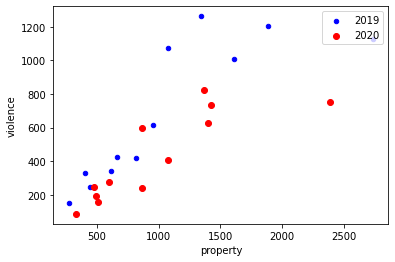

In [352]:
plt = cross2019.plot.scatter('property', 'violence', c='blue')
plt.scatter(cross2020['property'], cross2020['violence'], c='red')
plt.legend(['2019', '2020'], loc='upper right')
plt.plot()

## 7.3
Create a bar plot of the sum of annual violent and property crimes by district in Boston from 2019 to 2020. X axis: districts. Y axis: annual sums. Use different bars to represent data from different years. 

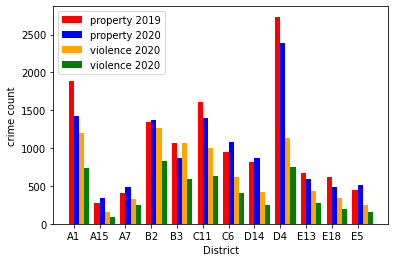

In [353]:
#just used the same crosstab from earlier, since less typing
import matplotlib.pyplot as plot
ranges = []
for i in range(4):
    ranges.append([x+.2*i for x in range(len(cross2019.index))])
plot.bar(ranges[0], height=cross2019['property'], align='edge', width=-0.2, color='red', tick_label=cross2019.index)
plot.bar(ranges[1], height=cross2020['property'], align='edge', width=-0.2, color='blue')
plot.bar(ranges[2], height=cross2019['violence'], align='edge', width=-0.2, color='orange')
plot.bar(ranges[3], height=cross2020['violence'], align='edge', width=-0.2, color='green')
plot.legend(['property 2019', 'property 2020', 'violence 2020', 'violence 2020'])
plot.xlabel('District')
plot.ylabel('crime count')
plot.show()

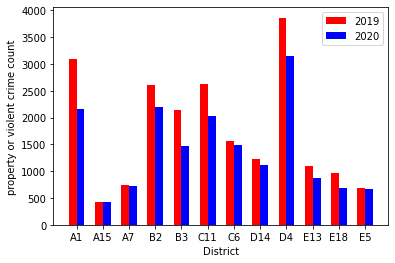

In [354]:
#was interesting to see how every district decreased in violent crime
#there was also a chance you wanted combined prop/violence, so including that as well
plot.bar(ranges[0], height=cross2019['property']+cross2019['violence'], align='edge', width=-0.3, color='red', tick_label=cross2019.index)
plot.bar(ranges[0], height=cross2020['property']+cross2020['violence'], align='edge', width=0.3, color='blue')
plot.legend(['2019', '2020'])
plot.xlabel('District')
plot.ylabel('property or violent crime count')
plot.show()

## 7.4
Create a violin plot of district-level shooting incidents by quarter in Boston from 2019 to 2020. X axis: quarters. Y axis: district-level shooting incidents (counts).

In [355]:
data = pandas.read_csv("combinedCrime.csv", low_memory=False)
data = data.query('DISTRICT != "External"')

In [356]:
data.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [357]:
data['Quarter'] = data['MONTH']//4

In [358]:
shootArray = []
i = 0
districtToNum = {} #maps
districtList = list(data['DISTRICT'].unique()) #since I wanted to sort it
districtList.sort()
for district in districtList:
    districtToNum[district] = i
    i += 1
for i in range(8):
    shootArray.append(list((data.query('Quarter == ' + str(i%4) + '& YEAR == ' + str(2019 + i//4) + ' & SHOOTING == 1'))['DISTRICT']))
    #shootArray[i] = [(ord(x[0])-64)*100+int(x[1:]) for x in shootArray[i]]
    shootArray[i] = [districtToNum[x] for x in shootArray[i]]

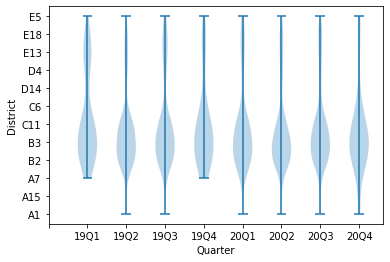

In [359]:
plot.violinplot(shootArray)
plot.yticks(ticks=range(len(districtList)), labels=districtList)
plot.ylabel('District')
plot.xticks(ticks=range(9), labels=[""]+[str(19+i//4)+'Q'+str(i%4+1) for i in range(8)]) #did 19/20 bc too crowded otherwise
plot.xlabel('Quarter')
plot.show()